In [2]:
# %%
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('data.csv',encoding='GBK')
#data = data.iloc[2:] #第三行10/10日开始

In [4]:
print(data)

               date  close_801010  open_801010  close_801030  open_801030  \
0      10/8/13 0:00       1824.24     1786.650      1847.870     1810.870   
1      10/9/13 0:00       1879.55     1815.400      1864.430     1844.620   
2     10/10/13 0:00       1869.71     1879.550      1852.170     1863.730   
3     10/11/13 0:00       1892.72     1868.630      1884.970     1857.920   
4     10/14/13 0:00       1975.64     1899.870      1898.590     1889.100   
...             ...           ...          ...           ...          ...   
2373    7/5/23 0:00       2946.60     2986.750      3739.080     3739.510   
2374    7/6/23 0:00       2962.93     2940.610      3723.570     3734.420   
2375    7/7/23 0:00       3005.30     2948.360      3704.780     3713.570   
2376   7/10/23 0:00       3008.38     3006.840      3745.590     3713.140   
2377   7/11/23 0:00       3007.38     3013.549      3775.793     3750.338   

      close_801040  open_801040  close_801050  open_801050  close_801080  .

In [5]:
i = 1
closelist = []
openlist = []
columnslist = []
#用i做循环 列名放到columnslist 开盘价数据组放到openlist 收盘价组放到closelist
for column in data.columns:
    if i%2 == 0 :
        closelist.append(data[column])
        columnslist.append(column)
    elif (i%2 == 1) & (i != 1):
        openlist.append(data[column])
    i += 1
print(closelist)

[0       1824.24
1       1879.55
2       1869.71
3       1892.72
4       1975.64
         ...   
2373    2946.60
2374    2962.93
2375    3005.30
2376    3008.38
2377    3007.38
Name: close_801010, Length: 2378, dtype: float64, 0       1847.870
1       1864.430
2       1852.170
3       1884.970
4       1898.590
          ...   
2373    3739.080
2374    3723.570
2375    3704.780
2376    3745.590
2377    3775.793
Name: close_801030, Length: 2378, dtype: float64, 0       1564.850
1       1566.770
2       1562.430
3       1589.070
4       1598.550
          ...   
2373    2252.550
2374    2223.380
2375    2224.120
2376    2223.840
2377    2233.531
Name: close_801040, Length: 2378, dtype: float64, 0       2689.780
1       2698.720
2       2683.880
3       2706.260
4       2685.050
          ...   
2373    4615.230
2374    4537.610
2375    4522.890
2376    4545.620
2377    4579.564
Name: close_801050, Length: 2378, dtype: float64, 0       1733.540
1       1747.200
2       1728.970
3       174

In [6]:
#读取所有日期作为index 放到indexlist
indexlist = list(data.iloc[:,0])
indexlist[0] = '2013-10-08'
print(indexlist)

['2013-10-08', '10/9/13 0:00', '10/10/13 0:00', '10/11/13 0:00', '10/14/13 0:00', '10/15/13 0:00', '10/16/13 0:00', '10/17/13 0:00', '10/18/13 0:00', '10/21/13 0:00', '10/22/13 0:00', '10/23/13 0:00', '10/24/13 0:00', '10/25/13 0:00', '10/28/13 0:00', '10/29/13 0:00', '10/30/13 0:00', '10/31/13 0:00', '11/1/13 0:00', '11/4/13 0:00', '11/5/13 0:00', '11/6/13 0:00', '11/7/13 0:00', '11/8/13 0:00', '11/11/13 0:00', '11/12/13 0:00', '11/13/13 0:00', '11/14/13 0:00', '11/15/13 0:00', '11/18/13 0:00', '11/19/13 0:00', '11/20/13 0:00', '11/21/13 0:00', '11/22/13 0:00', '11/25/13 0:00', '11/26/13 0:00', '11/27/13 0:00', '11/28/13 0:00', '11/29/13 0:00', '12/2/13 0:00', '12/3/13 0:00', '12/4/13 0:00', '12/5/13 0:00', '12/6/13 0:00', '12/9/13 0:00', '12/10/13 0:00', '12/11/13 0:00', '12/12/13 0:00', '12/13/13 0:00', '12/16/13 0:00', '12/17/13 0:00', '12/18/13 0:00', '12/19/13 0:00', '12/20/13 0:00', '12/23/13 0:00', '12/24/13 0:00', '12/25/13 0:00', '12/26/13 0:00', '12/27/13 0:00', '12/30/13 0:

In [7]:
closedf = pd.concat(closelist,axis=1).astype('float')
closedf.index = pd.to_datetime(indexlist)
opendf = pd.concat(openlist,axis=1).astype('float')
opendf.index = pd.to_datetime(indexlist)
print(closedf)
print(opendf)

            close_801010  close_801030  close_801040  close_801050  \
2013-10-08       1824.24      1847.870      1564.850      2689.780   
2013-10-09       1879.55      1864.430      1566.770      2698.720   
2013-10-10       1869.71      1852.170      1562.430      2683.880   
2013-10-11       1892.72      1884.970      1589.070      2706.260   
2013-10-14       1975.64      1898.590      1598.550      2685.050   
...                  ...           ...           ...           ...   
2023-07-05       2946.60      3739.080      2252.550      4615.230   
2023-07-06       2962.93      3723.570      2223.380      4537.610   
2023-07-07       3005.30      3704.780      2224.120      4522.890   
2023-07-10       3008.38      3745.590      2223.840      4545.620   
2023-07-11       3007.38      3775.793      2233.531      4579.564   

            close_801080  close_801110  close_801120  close_801130  \
2013-10-08      1733.540      2551.990       5020.14      1591.780   
2013-10-09      174

In [8]:
closedf.to_csv('close.csv')
opendf.to_csv('open.csv')

In [9]:
# 更换采样频率 - 月收盘价，月涨跌幅 = （上月收盘价/本月收盘价）-1  shift?
monthclose = closedf.resample('M').last()
monthopen = opendf.resample('M').last()
nextmonthret = (monthclose.shift(-1) / monthclose) - 1
#nextmonthret0 = (monthopen / monthclose) - 1
#nextmonthret0 = [monthopen[monthopen.columns[ii]] / monthclose[monthclose.columns[ii]] - 1 for ii in range(len(monthclose.columns))] 
#nextmonthret = pd.concat(nextmonthret0,axis=1).astype('float')
nextmonthret = nextmonthret.iloc[:-2]
print(nextmonthret)

            close_801010  close_801030  close_801040  close_801050  \
2013-10-31      0.075336      0.061435      0.044093      0.035215   
2013-11-30     -0.028763     -0.042546     -0.027325     -0.073631   
2013-12-31     -0.080769     -0.040668     -0.077711     -0.036512   
2014-01-31      0.006631      0.040338      0.027375      0.045863   
2014-02-28     -0.048507     -0.008256     -0.008246     -0.040028   
...                  ...           ...           ...           ...   
2023-01-31      0.005810      0.026413      0.045471     -0.035799   
2023-02-28     -0.019502     -0.071974     -0.074404     -0.039848   
2023-03-31     -0.042105     -0.077422     -0.026708     -0.014879   
2023-04-30     -0.100528     -0.055083     -0.047391     -0.081364   
2023-05-31      0.029839      0.025522     -0.005499      0.009264   

            close_801080  close_801110  close_801120  close_801130  \
2013-10-31      0.109160      0.047561      0.033833      0.053953   
2013-11-30     -0.0

In [41]:
retdf = (closedf / closedf.shift(1)) - 1
dayretdf = (closedf / opendf) - 1
#dayretdf = (closedf.div(opendf)) - 1
nightretdf = (opendf / closedf.shift(1)) - 1

#print(len(closedf.columns))
#print(len(opendf.columns))
#print(closedf/opendf)
#opendf2 = opendf[['open_801780']]
#closedf2 = closedf[['close_801780']]

dayretdf = [closedf[closedf.columns[ii]] / opendf[opendf.columns[ii]] - 1 for ii in range(len(opendf.columns))] 
dayretdf2 = pd.concat(dayretdf,axis=1).astype('float')

#nightretdf = pd.concat(list,axis=1).astype('float')
#print(opendf[opendf.columns[1]] / closedf[closedf.columns[0]] - 1)

#除的时候没有shift
nightretdf = [opendf[opendf.columns[ii]] / closedf[closedf.columns[ii]].shift(1) - 1 for ii in range(0, len(closedf.columns))] 
#nightretdf2 = pd.concat(,axis=1).astype('float')
#tmp = [opendf[opendf.columns[ii]] for ii in range(0, len(opendf.columns))]
#tmp2 = [closedf[closedf.columns[ii]].shift(1) for ii in range(0, len(closedf.columns))]
#print(tmp2)
#print(opendf)
#print(closedf.shift(1))

nightretdf2 = pd.concat(nightretdf,axis=1).astype('float')
print(nightretdf2)

                  0         1         2         3         4         5   \
2013-10-08       NaN       NaN       NaN       NaN       NaN       NaN   
2013-10-09 -0.004846 -0.001759 -0.003866 -0.002710 -0.002088 -0.004428   
2013-10-10  0.000000 -0.000375 -0.000747 -0.001482 -0.000572 -0.001787   
2013-10-11 -0.000578  0.003104  0.002202  0.001297  0.000127  0.003503   
2013-10-14  0.003778  0.002191 -0.000535 -0.003100 -0.000052  0.002181   
...              ...       ...       ...       ...       ...       ...   
2023-07-05 -0.001605 -0.001421 -0.002089 -0.001941 -0.001891  0.000101   
2023-07-06 -0.002033 -0.001246 -0.002797 -0.001887 -0.003430 -0.002213   
2023-07-07 -0.004917 -0.002686 -0.003090 -0.005161 -0.002589 -0.002813   
2023-07-10  0.000512  0.002257 -0.000782  0.002498  0.002186  0.001759   
2023-07-11  0.001718  0.001268  0.001322  0.000952  0.000771  0.003263   

                  6         7         8         9   ...        21        22  \
2013-10-08       NaN       NaN  

In [42]:
def get_factor(data,backsee=20,start_time="2013-10-01",end_time="2023-06-30"):
    fac = pd.DataFrame(data=None)
    for time in pd.date_range(start=start_time, end=end_time, freq='M'):
        df = data[:time][-backsee:]
        mean = (df + 1).prod()
        mean.name = time
        fac = pd.concat([fac, mean], axis=1)
    return fac.T
ret20 = get_factor(retdf)
dayret20 = get_factor(dayretdf2)
nightret20 = get_factor(nightretdf2)

print(ret20)

#fac = pd.DataFrame(data=None)
#time=pd.date_range(start="2013-10-01", end="2023-06-30", freq='M')[0]
#df = data[:time][-20:]
#print(df)
#mean = (df + 1).prod()
#print(mean)

            close_801010  close_801030  close_801040  close_801050  \
2013-10-31      0.993729      0.962259      0.975237      0.929693   
2013-11-30      1.087842      1.070180      1.046259      1.022680   
2013-12-31      1.000751      0.981314      0.975945      0.932881   
2014-01-31      0.910960      0.952501      0.915608      0.964345   
2014-02-28      0.969926      1.026629      1.006808      1.030191   
...                  ...           ...           ...           ...   
2023-02-28      1.005810      1.026413      1.045471      0.964201   
2023-03-31      0.985658      0.930959      0.912390      0.962308   
2023-04-30      0.974254      0.928065      0.981123      0.992280   
2023-05-31      0.899472      0.944917      0.952609      0.918636   
2023-06-30      1.029839      1.025522      0.994501      1.009264   

            close_801080  close_801110  close_801120  close_801130  \
2013-10-31      0.922459      1.087367      0.943898      0.976925   
2013-11-30      1.1

In [43]:
# 重新分组
def get_group(factor,num): 
    cutfactor=factor.rank(axis=0).apply(lambda x:pd.qcut(x,num,range(1,num+1),duplicates='raise'),axis=0)
    cutfactor=cutfactor[cutfactor==1]
    group=pd.DataFrame()
    for i in range(len(cutfactor.columns)):
        group1=cutfactor.iloc[:,i].dropna().reset_index().iloc[:,0]
        group=pd.concat([group,group1],axis=1)
    group.columns=cutfactor.columns
    group=group
    return group

In [44]:
get_group(ret20.T,5)

,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,close_801080,close_801050,close_801050,close_801010,close_801110,close_801080,close_801030,close_801120,close_801120,close_801080,...,close_801010,close_801110,close_801080,close_801050,close_801010,close_801050,close_801030,close_801030,close_801010,close_801150
1,close_801150,close_801150,close_801710,close_801040,close_801180,close_801730,close_801130,close_801130,close_801170,close_801150,...,close_801080,close_801120,close_801730,close_801180,close_801170,close_801180,close_801040,close_801080,close_801050,close_801170
2,close_801200,close_801160,close_801770,close_801120,close_801720,close_801740,close_801730,close_801170,close_801180,close_801750,...,close_801710,close_801180,close_801740,close_801720,close_801180,close_801200,close_801140,close_801120,close_801200,close_801200
3,close_801750,close_801180,close_801780,close_801720,close_801760,close_801750,close_801750,close_801710,close_801200,close_801760,...,close_801730,close_801710,close_801750,close_801770,close_801200,close_801730,close_801180,close_801200,close_801710,close_801720
4,close_801760,close_801780,close_801790,close_801790,close_801790,close_801760,close_801890,close_801780,close_801720,close_801770,...,close_801760,close_801780,close_801770,close_801890,close_801210,close_801780,close_801710,close_801210,close_801720,close_801760
5,close_801770,close_801950,close_801950,close_801950,close_801950,close_801770,close_801960,close_801970,close_801790,close_801970,...,close_801790,close_801950,close_801880,close_801950,close_801230,close_801790,close_801740,close_801710,close_801950,close_801780
6,close_801980,close_801980,close_801960,close_801980,close_801980,close_801970,close_801970,close_801980,close_801950,close_801980,...,close_801880,close_801960,close_801980,close_801960,close_801950,close_801880,close_801790,close_801880,close_801960,close_801790


In [45]:
# 构建对冲组
def group_analysis(factor,forward_return,num):  
    cutfactor=factor.rank(axis=0).apply(lambda x:pd.qcut(x,num,range(1,num+1),duplicates='drop'),axis=0)
    result=pd.DataFrame()
    for group in range(1,1+num):
        group_return=forward_return[cutfactor==group].mean(axis=0)
        result[group]=group_return 
    result['Hedge']=result[1]-result[num]
    result=result.shift(1)
    return result

In [46]:
# IC净值
def get_IC(neu,month_return):
    RankIC=[]
    IC=[]
    for i in range(neu.columns.size-1):
        RankIC.append(neu.iloc[:,i].corr(month_return.iloc[:,i],method="spearman"))
        IC.append(neu.iloc[:,i].corr(month_return.iloc[:,i],method="pearson"))
    IC=pd.DataFrame(IC)
    RankIC=pd.DataFrame(RankIC)
    return IC,RankIC

# 年化IC&IR
def get_Cor(neu,month_return):
    IC,RankIC=get_IC(neu,month_return)
    cor=pd.DataFrame()
    cor['IC']=IC.mean()
    cor['ICIR']=(IC.mean()/IC.std())*(12**0.5)
    cor['RankIC']=RankIC.mean()
    cor['RankICIR']=(RankIC.mean()/RankIC.std())*(12**0.5)
    return cor.T

# 最大回撤
def get_maxDrawDown(return_list):
    """
    求最大回撤率
    #param return_list:Series格式月度收益率
    #return：0~1
    """      
    return_list=list((return_list+1).cumprod())
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    else:
        j = np.argmax(return_list[:i])  # 开始位置
        return((return_list[j] - return_list[i]) / (return_list[j]))

# 胜率
def get_winrate(Rev_seq):
    ret_winrate=Rev_seq[Rev_seq>=0].count()/Rev_seq.count()
    return ret_winrate

# 数据输出:年化收益率、信息比率、最大回撤、胜率  
def evaluate_PortfolioRet(Rev_seq,num,t=12,tests='Hedge'):
    """
    数据输出:多空对冲年化收益率、信息比率、最大回撤、胜率  
    #Rev_seq:DataFrame 收益数据
    #return：回测指标表
    """
    if type(Rev_seq)==type(pd.DataFrame()):  
        if tests=='Hedge':
            num=num
        else:
            num=0
        Rev_seq=Rev_seq.iloc[:,(num)]
    else:
        Rev_seq=Rev_seq
    Rev_seq=Rev_seq.replace(np.nan,0)
    ret_mean=((np.prod(Rev_seq.values+1))**(1/len(Rev_seq.values)))**t-1
    ret_std=Rev_seq.std()*t**0.5
    ret_winrate=get_winrate(Rev_seq)
    ret_maxloss=get_maxDrawDown(Rev_seq)
    ret_sharp=ret_mean/ret_std
    return pd.DataFrame([ret_mean,ret_std,ret_sharp,ret_winrate,ret_maxloss],index=['年化收益率:','波动率:','信息比率:','胜率:','最大回撤'])

In [47]:
def gn(data):
    data=data.T
    data=((data-data.mean())/data.std())
    #data=(data-data.min())/(data.max()-data.min()) + 0.00000000001
    return data.T

In [48]:
#？？
def get_del(factor,delfac):
    
    tr_long=delfac.stack()
    tr_long.columns=['tr']
    str_long=factor.stack()
    str_long.columns=['str']
    
    tr_str_long=pd.concat([tr_long,str_long],axis=1)
    tr_str_long=tr_str_long.reset_index()
    tr_str_long.columns=["date","code","tr","str"]
    tr_str_long=tr_str_long.dropna()
    
    def neu(df):
        y_sps=smf.ols('str~tr',data=df).fit()
        y_pre=y_sps.predict(df['tr'])
        residual=df.str-y_pre
        df=df.assign(estr=residual)
        return df
    
    tr_str_long=tr_str_long.groupby('date').apply(neu)
    estr=tr_str_long[['date','code','estr']]
    estr=estr.set_index(['date','code']).unstack()
    estr.columns=[i[1] for i in list(estr.columns)]
    # estr=estr.T
    return estr

,0
年化收益率:,0.048513
波动率:,0.114066
信息比率:,0.425304
胜率:,0.573034
最大回撤,0.218847


,0
IC,0.059912
ICIR,2.670420
RankIC,0.027268
RankICIR,1.244295


,1,2,3,4,5,Hedge
2016-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-29,0.978050,0.978832,0.990362,0.981725,0.980783,0.997267
2016-03-31,1.104018,1.126474,1.149670,1.131997,1.101453,1.003011
2016-04-30,1.091810,1.096725,1.128118,1.117736,1.094055,0.998658
2016-05-31,1.070823,1.096711,1.108129,1.098934,1.063866,1.007018
...,...,...,...,...,...,...
2023-01-31,1.591392,1.221655,1.067601,1.215762,1.200569,1.285789
2023-02-28,1.636556,1.232646,1.093606,1.241703,1.169499,1.355555
2023-03-31,1.619735,1.234861,1.106431,1.205121,1.125743,1.392340
2023-04-30,1.574938,1.235758,1.090708,1.202539,1.102844,1.382153


<AxesSubplot:>

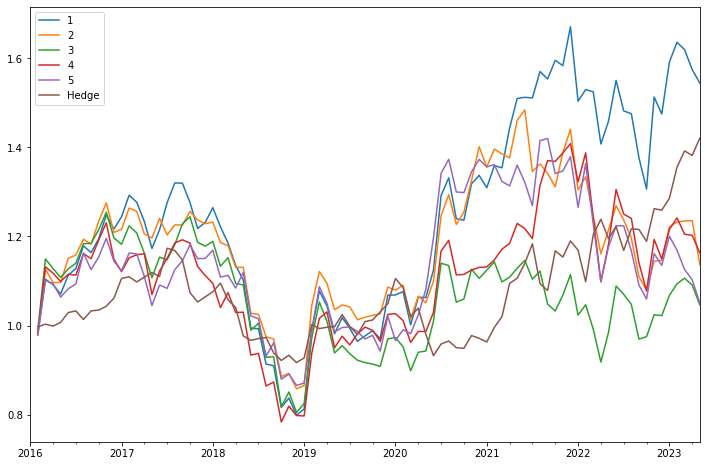

In [51]:
num = 5
#factor = get_del(gn(nightret20) - gn(dayret20) , ret20)
factor =  nightret20
#factor =  ret20
name = [ii.replace('close_','')for ii in nextmonthret.columns]
factor.columns=name
nextmonthret.columns=name
result = group_analysis(factor.T,nextmonthret['2016-01-01':].T,num)
#rm = result.T.iloc[:-1].mean()
#result = pd.concat([result,rm],axis=1)
cprodresult=(result+1).cumprod()
cprodresult.to_excel('nightret20.xlsx')
#cprodresult.to_excel('ret20.xlsx')

#result是list？：
display(evaluate_PortfolioRet(result,num))
display(get_Cor(factor,nextmonthret))
display(cprodresult)
cprodresult.plot(figsize=(12,8))